## 1차 과제

- 데이터: 2018 사교육비 총조사

https://mdis.kostat.go.kr/ofrData/selectOfrDataDetail.do?survId=95&itmDiv=1&nPage=3&itemId=2008&itemNm=

- 제출 양식: 이름_n차_과제.ipynb
- 사용 라이브러리: pandas, numpy, matplotlib, seaborn, OneHotEncoder

**코드형태로 되어 있는 컬럼의 경우 파일설계서를 참고하시기 바랍니다.**

### 1. 데이터 불러오기

1.1 사용할 라이브러리와 데이터를 불러오고 앞 10개의 데이터만 출력하세요.

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df1 = pd.read_csv('사교육비조사.csv',encoding = 'cp949')
print(df1.head(10))
#(공공용)2018년 초중고 사교육비조사 파일설계서 및 코드집

   지역구분코드  행정구역시도코드  학교급구분코드  방과후학교참여여부  방과후학교참여시간수  EBS교재비   사교육참여시간수  \
0       1        11        1          1    0.333333     0.0   6.333333   
1       1        11        1          1    0.666667     0.0   0.000000   
2       1        11        1          1    0.666667     0.0   0.000000   
3       1        11        1          1    0.666667     0.0   0.000000   
4       1        11        1          1    0.666667     0.0   1.000000   
5       1        11        1          1    0.666667     0.0   1.000000   
6       1        11        1          1    0.666667     0.0   1.000000   
7       1        11        1          1    0.666667     0.0   1.000000   
8       1        11        1          1    0.666667     0.0   1.333333   
9       1        11        1          1    0.666667     0.0  10.333333   

   일반교과사교육시간수  예체능사교육시간수     사교육비총비용  총자녀수  학생성적구분코드  부_교육정도코드  모_교육정도코드  \
0    4.333333   2.000000  392.236071     2       NaN      51.0      31.0   
1    0.000000   0.000000    0.000

In [3]:
df2 = pd.read_excel('(공공용)2018년 초중고 사교육비조사 파일설계서 및 코드집.xlsx')
print(df2.head(10))

  2018년 초중고 사교육비조사 코드집\n(조사표와 병행하여 참고하세요) Unnamed: 1 Unnamed: 2 Unnamed: 3  \
0                                     NaN        NaN        NaN        NaN   
1                                 조사표\n번호        항목명         코드        코드명   
2                                     NaN      지역 구분          1         서울   
3                                     NaN        NaN          2        광역시   
4                                     NaN        NaN          3       중소도시   
5                                     NaN        NaN          4       읍면지역   
6                                     NaN   행정구역(시도)         11         서울   
7                                     NaN        NaN         21         부산   
8                                     NaN        NaN         22         대구   
9                                     NaN        NaN         23         인천   

  Unnamed: 4 Unnamed: 5  
0        NaN        NaN  
1         길이         비고  
2          1        NaN  
3        NaN        NaN  
4        Na

1.2 불러온 데이터의 요약 정보를 출력하세요.

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21275 entries, 0 to 21274
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   지역구분코드        21275 non-null  int64  
 1   행정구역시도코드      21275 non-null  int64  
 2   학교급구분코드       21275 non-null  int64  
 3   방과후학교참여여부     21275 non-null  int64  
 4   방과후학교참여시간수    21275 non-null  float64
 5   EBS교재비        21275 non-null  float64
 6   사교육참여시간수      21275 non-null  float64
 7   일반교과사교육시간수    21275 non-null  float64
 8   예체능사교육시간수     21275 non-null  float64
 9   사교육비총비용       21275 non-null  float64
 10  총자녀수          21275 non-null  int64  
 11  학생성적구분코드      9426 non-null   float64
 12  부_교육정도코드      20172 non-null  float64
 13  모_교육정도코드      20547 non-null  float64
 14  부모경제활동코드      21149 non-null  float64
 15  월평균가구소득코드     21274 non-null  float64
 16  진학희망고등학교유형코드  11848 non-null  float64
dtypes: float64(12), int64(5)
memory usage: 2.8 MB


1.2 데이터의 기술통계량을 출력하세요.

In [5]:
df1.describe()

,지역구분코드,행정구역시도코드,학교급구분코드,방과후학교참여여부,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드
count,21275.000000,21275.000000,21275.000000,21275.000000,21275.000000,21275.000000,21275.000000,21275.000000,21275.000000,21275.000000,21275.000000,9426.000000,20172.000000,20547.000000,21149.000000,21274.000000,11848.000000
mean,1.521269,16.645311,2.226792,1.514924,2.311915,3.556789,6.992526,5.134179,1.797493,472.571986,2.048461,3.178761,45.781380,43.563148,2.223604,4.646752,2.006583
std,0.499559,5.439219,0.939876,0.499789,3.672402,9.589653,6.754990,6.053445,3.690619,502.475123,0.662775,1.247758,11.522935,10.735189,0.964952,2.218925,1.610390
min,1.000000,11.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,8.000000,8.000000,1.000000,1.000000,1.000000
25%,1.000000,11.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,31.000000,31.000000,1.000000,3.000000,1.000000
50%,2.000000,21.000000,2.000000,2.000000,0.000000,0.000000,6.000000,3.000000,0.000000,356.578247,2.000000,3.000000,51.000000,41.000000,3.000000,4.000000,1.000000
75%,2.000000,22.000000,3.000000,2.000000,3.333333,0.000000,11.000000,9.333333,2.000000,723.156493,2.000000,4.000000,51.000000,51.000000,3.000000,7.000000,3.000000
max,2.000000,23.000000,4.000000,2.000000,34.666667,127.948048,76.000000,76.000000,52.000000,5374.156458,8.000000,5.000000,75.000000,75.000000,4.000000,8.000000,8.000000


### 2. EDA 및 전처리

2.1 해당 데이터는 초중고 학생이 모두 들어있는 데이터로 보다 명확한 분석을 위해 고등학생만을 대상으로 분석합니다.

이를 위해 학교급구분코드가 3(고등학생)인 데이터만 남기도록 하고 몇개의 데이터가 남았는지 확인 후 학교급구분코드 컬럼을 삭제하세요.

In [6]:
df_highSchool = df1[df1['학교급구분코드'] == 3]
df_highSchool.head(5)

,지역구분코드,행정구역시도코드,학교급구분코드,방과후학교참여여부,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드
4920,1,11,3,1,0.333333,0.0,0.0,0.0,0.0,0.000000,1,2.0,71.0,61.0,2.0,4.0,NaN
4921,1,11,3,1,0.333333,0.0,0.0,0.0,0.0,0.000000,2,3.0,51.0,51.0,3.0,6.0,NaN
4922,1,11,3,1,0.333333,0.0,0.0,0.0,0.0,0.000000,2,5.0,31.0,41.0,3.0,4.0,NaN
4923,1,11,3,1,0.333333,0.0,0.0,0.0,0.0,0.000000,2,5.0,51.0,51.0,3.0,1.0,NaN
4924,1,11,3,1,0.333333,0.0,12.0,12.0,0.0,2203.395453,2,4.0,71.0,62.0,1.0,8.0,NaN


In [7]:
#방법1_데이터확인
print(df_highSchool['학교급구분코드'].unique())  #3만 남았는지 확인
print(df_highSchool.shape)  #데이터 수
print(df1.shape)  #기존 데이터 수

[3]
(7961, 17)
(21275, 17)


In [8]:
#방법2_데이터확인
df_highSchool['학교급구분코드'].value_counts() #각각의 값 개수 세기

3    7961
Name: 학교급구분코드, dtype: int64

In [9]:
df_highSchool = df_highSchool.drop('학교급구분코드', axis=1)  #열 삭제
print(df_highSchool.head())
print(df_highSchool.shape)

      지역구분코드  행정구역시도코드  방과후학교참여여부  방과후학교참여시간수  EBS교재비  사교육참여시간수  일반교과사교육시간수  \
4920       1        11          1    0.333333     0.0       0.0         0.0   
4921       1        11          1    0.333333     0.0       0.0         0.0   
4922       1        11          1    0.333333     0.0       0.0         0.0   
4923       1        11          1    0.333333     0.0       0.0         0.0   
4924       1        11          1    0.333333     0.0      12.0        12.0   

      예체능사교육시간수      사교육비총비용  총자녀수  학생성적구분코드  부_교육정도코드  모_교육정도코드  부모경제활동코드  \
4920        0.0     0.000000     1       2.0      71.0      61.0       2.0   
4921        0.0     0.000000     2       3.0      51.0      51.0       3.0   
4922        0.0     0.000000     2       5.0      31.0      41.0       3.0   
4923        0.0     0.000000     2       5.0      51.0      51.0       3.0   
4924        0.0  2203.395453     2       4.0      71.0      62.0       1.0   

      월평균가구소득코드  진학희망고등학교유형코드  
4920        4.0         

2.2 지역구분코드와 행정구역시도코드를 삭제하세요(분석에 필요할 것으로 보이나 현재는 편의상 삭제).

In [10]:
df_highSchool = df_highSchool.drop(['지역구분코드','행정구역시도코드'], axis=1)  #열 삭제
print(df_highSchool.head())
print(df_highSchool.shape)

      방과후학교참여여부  방과후학교참여시간수  EBS교재비  사교육참여시간수  일반교과사교육시간수  예체능사교육시간수  \
4920          1    0.333333     0.0       0.0         0.0        0.0   
4921          1    0.333333     0.0       0.0         0.0        0.0   
4922          1    0.333333     0.0       0.0         0.0        0.0   
4923          1    0.333333     0.0       0.0         0.0        0.0   
4924          1    0.333333     0.0      12.0        12.0        0.0   

          사교육비총비용  총자녀수  학생성적구분코드  부_교육정도코드  모_교육정도코드  부모경제활동코드  월평균가구소득코드  \
4920     0.000000     1       2.0      71.0      61.0       2.0        4.0   
4921     0.000000     2       3.0      51.0      51.0       3.0        6.0   
4922     0.000000     2       5.0      31.0      41.0       3.0        4.0   
4923     0.000000     2       5.0      51.0      51.0       3.0        1.0   
4924  2203.395453     2       4.0      71.0      62.0       1.0        8.0   

      진학희망고등학교유형코드  
4920           NaN  
4921           NaN  
4922           NaN  
4923          

2.3 방과후학교참여여부에 속한 값들의 개수를 확인하고 One Hot Encoding을 통해 1과 2를 각각 참여, 미참여의 dummy variable로 만드세요.

In [11]:
df_highSchool['방과후학교참여여부'].value_counts()

1    4284
2    3677
Name: 방과후학교참여여부, dtype: int64

In [12]:
df_highSchool=pd.get_dummies(df_highSchool, columns = ['방과후학교참여여부'],drop_first=True)   #더미변수 수정
print(df_highSchool.head())
print(df_highSchool['방과후학교참여여부_2'].value_counts())

      방과후학교참여시간수  EBS교재비  사교육참여시간수  일반교과사교육시간수  예체능사교육시간수      사교육비총비용  총자녀수  \
4920    0.333333     0.0       0.0         0.0        0.0     0.000000     1   
4921    0.333333     0.0       0.0         0.0        0.0     0.000000     2   
4922    0.333333     0.0       0.0         0.0        0.0     0.000000     2   
4923    0.333333     0.0       0.0         0.0        0.0     0.000000     2   
4924    0.333333     0.0      12.0        12.0        0.0  2203.395453     2   

      학생성적구분코드  부_교육정도코드  모_교육정도코드  부모경제활동코드  월평균가구소득코드  진학희망고등학교유형코드  \
4920       2.0      71.0      61.0       2.0        4.0           NaN   
4921       3.0      51.0      51.0       3.0        6.0           NaN   
4922       5.0      31.0      41.0       3.0        4.0           NaN   
4923       5.0      51.0      51.0       3.0        1.0           NaN   
4924       4.0      71.0      62.0       1.0        8.0           NaN   

      방과후학교참여여부_2  
4920            0  
4921            0  
4922            0  


In [13]:
df_highSchool.rename(columns={'방과후학교참여여부_2': '방과후학교참여여부'}, inplace=True)   #더미변수 명칭 수정
print(df_highSchool.head())
print(df_highSchool['방과후학교참여여부'].value_counts())

      방과후학교참여시간수  EBS교재비  사교육참여시간수  일반교과사교육시간수  예체능사교육시간수      사교육비총비용  총자녀수  \
4920    0.333333     0.0       0.0         0.0        0.0     0.000000     1   
4921    0.333333     0.0       0.0         0.0        0.0     0.000000     2   
4922    0.333333     0.0       0.0         0.0        0.0     0.000000     2   
4923    0.333333     0.0       0.0         0.0        0.0     0.000000     2   
4924    0.333333     0.0      12.0        12.0        0.0  2203.395453     2   

      학생성적구분코드  부_교육정도코드  모_교육정도코드  부모경제활동코드  월평균가구소득코드  진학희망고등학교유형코드  \
4920       2.0      71.0      61.0       2.0        4.0           NaN   
4921       3.0      51.0      51.0       3.0        6.0           NaN   
4922       5.0      31.0      41.0       3.0        4.0           NaN   
4923       5.0      51.0      51.0       3.0        1.0           NaN   
4924       4.0      71.0      62.0       1.0        8.0           NaN   

      방과후학교참여여부  
4920          0  
4921          0  
4922          0  
4923    

2.4 EBS교재비의 경우 0값이 절반 이상이므로 모델 성능에 영향을 미칠 수 있기에 삭제하겠습니다.

In [14]:
df_highSchool = df_highSchool.drop('EBS교재비', axis=1)
df_highSchool.head()

,방과후학교참여시간수,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드,방과후학교참여여부
4920,0.333333,0.0,0.0,0.0,0.000000,1,2.0,71.0,61.0,2.0,4.0,NaN,0
4921,0.333333,0.0,0.0,0.0,0.000000,2,3.0,51.0,51.0,3.0,6.0,NaN,0
4922,0.333333,0.0,0.0,0.0,0.000000,2,5.0,31.0,41.0,3.0,4.0,NaN,0
4923,0.333333,0.0,0.0,0.0,0.000000,2,5.0,51.0,51.0,3.0,1.0,NaN,0
4924,0.333333,12.0,12.0,0.0,2203.395453,2,4.0,71.0,62.0,1.0,8.0,NaN,0


2.5 학생성적구분코드에 따른 사교육비총비용의 분포를 BoxPlot으로 나타내세요.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50977 (\N{HANGUL SYLLABLE YUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/I

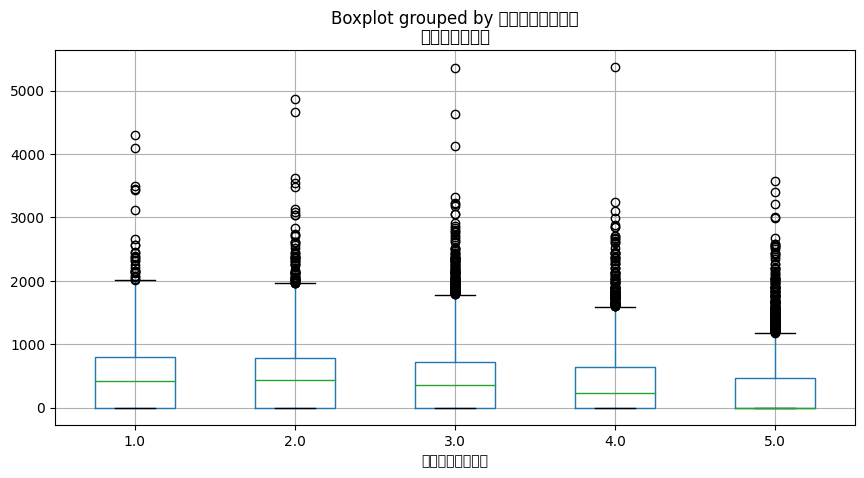

In [ ]:
df_highSchool.boxplot(column='사교육비총비용', by='학생성적구분코드', figsize=(10, 5))
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packa

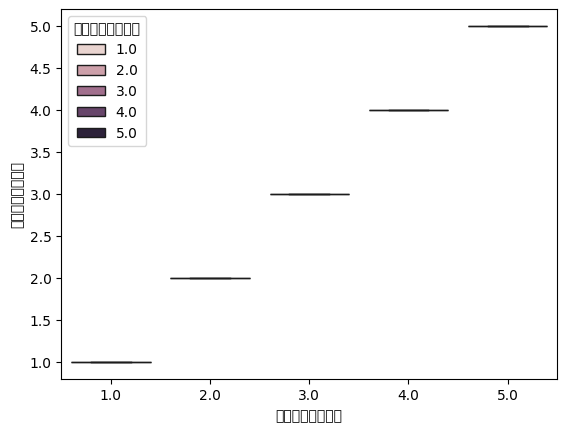

In [15]:
sns.boxplot(y='학생성적구분코드', x='학생성적구분코드', hue='학생성적구분코드', data=df_highSchool)
plt.show()

2.6 학생성적구분코드에 속한 값들의 밸런스를 확인해봤을 때 중위값이 과도하게 많으므로 1, 2를 상위, 4, 5를 하위로 묶은 후 One Hot Encoding을 통해 dummy variable로 변환하세요.

In [16]:
df_highSchool.loc[df_highSchool['학생성적구분코드']==1,'학생성적구분코드']="상위"

In [17]:
df_highSchool.loc[df_highSchool['학생성적구분코드']==2,'학생성적구분코드']="상위"

In [18]:
df_highSchool.loc[df_highSchool['학생성적구분코드']==4,'학생성적구분코드']="하위"

In [19]:
df_highSchool.loc[df_highSchool['학생성적구분코드']==5,'학생성적구분코드']="하위"

In [20]:
print(df_highSchool.head())  #구조재확인

      방과후학교참여시간수  사교육참여시간수  일반교과사교육시간수  예체능사교육시간수      사교육비총비용  총자녀수 학생성적구분코드  \
4920    0.333333       0.0         0.0        0.0     0.000000     1       상위   
4921    0.333333       0.0         0.0        0.0     0.000000     2      3.0   
4922    0.333333       0.0         0.0        0.0     0.000000     2       하위   
4923    0.333333       0.0         0.0        0.0     0.000000     2       하위   
4924    0.333333      12.0        12.0        0.0  2203.395453     2       하위   

      부_교육정도코드  모_교육정도코드  부모경제활동코드  월평균가구소득코드  진학희망고등학교유형코드  방과후학교참여여부  
4920      71.0      61.0       2.0        4.0           NaN          0  
4921      51.0      51.0       3.0        6.0           NaN          0  
4922      31.0      41.0       3.0        4.0           NaN          0  
4923      51.0      51.0       3.0        1.0           NaN          0  
4924      71.0      62.0       1.0        8.0           NaN          0  


In [21]:
df_highSchool['학생성적구분코드'].value_counts()  #열확인

하위     3139
상위     2426
3.0    2396
Name: 학생성적구분코드, dtype: int64

In [22]:
df_highSchool['학생성적구분코드']  #원핫인코딩시 하위입력 확인용

4920      상위
4921     3.0
4922      하위
4923      하위
4924      하위
        ... 
18308     하위
18309     하위
18310    3.0
18311    3.0
18312    3.0
Name: 학생성적구분코드, Length: 7961, dtype: object

In [23]:
df_highSchool = pd.get_dummies(df_highSchool, columns = ['학생성적구분코드'],drop_first=True) #더미변수
print(df_highSchool.head())

      방과후학교참여시간수  사교육참여시간수  일반교과사교육시간수  예체능사교육시간수      사교육비총비용  총자녀수  \
4920    0.333333       0.0         0.0        0.0     0.000000     1   
4921    0.333333       0.0         0.0        0.0     0.000000     2   
4922    0.333333       0.0         0.0        0.0     0.000000     2   
4923    0.333333       0.0         0.0        0.0     0.000000     2   
4924    0.333333      12.0        12.0        0.0  2203.395453     2   

      부_교육정도코드  모_교육정도코드  부모경제활동코드  월평균가구소득코드  진학희망고등학교유형코드  방과후학교참여여부  \
4920      71.0      61.0       2.0        4.0           NaN          0   
4921      51.0      51.0       3.0        6.0           NaN          0   
4922      31.0      41.0       3.0        4.0           NaN          0   
4923      51.0      51.0       3.0        1.0           NaN          0   
4924      71.0      62.0       1.0        8.0           NaN          0   

      학생성적구분코드_상위  학생성적구분코드_하위  
4920            1            0  
4921            0            0  
4922            0      

In [24]:
print(df_highSchool['학생성적구분코드_상위'].value_counts())  #상위-10, 하위-01, 3-00
print(df_highSchool['학생성적구분코드_하위'].value_counts())

0    5535
1    2426
Name: 학생성적구분코드_상위, dtype: int64
0    4822
1    3139
Name: 학생성적구분코드_하위, dtype: int64


2.7 Label Encoding과 One Hot Encoding의 차이에 대해 서술하세요.

- Label Encoding: 알파벳 오더순으로 값을 할당하는 것으로 순서나 랭크가 반영되지는 않음

- One Hot Encoding: 개별로 목록값에 대한 이진값으로 할당하는 것

2.8 dummy variable로 변환된 기존 변수와 dummy variable 중 하나를 삭제하겠습니다(다중공선성 문제).

In [ ]:
#삭제 완료함(코드:drop_first=True)

2.9 다중공선성 문제가 무엇인지 작성하고 왜 이것이 One Hot Encoding의 dummy variable과 관련 있는지 작성하세요.

다중공선성은 독립적인 변수간에 강한상관이 발생하는 문제로 예측성능 저하가 발생할 수 있다.

One Hot Encoding 시에 해당 범주형 변수의 범주값 개수만큼 새로운 컬럼이 생성되기 때문에 다중공선성 문제가 발생할 수 있다.

2.10 사교육참여시간수, 일반교과사교육시간수, 예체능사교육시간수의 상관 관계를 Heatmap으로 시각화하세요.

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 50977 (\N{HANGUL SYLLABLE YUG}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 52280 (\N{HANGUL SYLLABLE CAM}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/

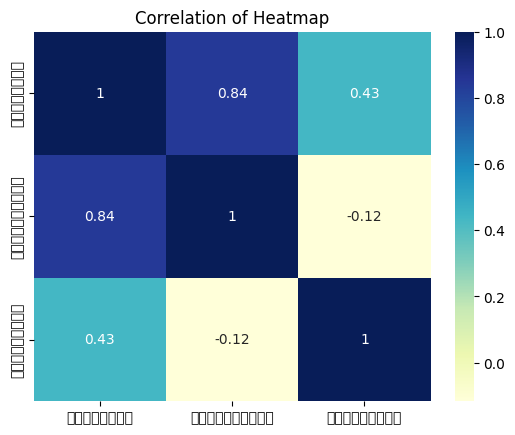

In [25]:
heatMap=df_highSchool[['사교육참여시간수', '일반교과사교육시간수', '예체능사교육시간수']].corr()   #상관계수 계산

sns.heatmap(heatMap, cmap='YlGnBu', annot=True)   #cmap: 색, annot:셀에 숫자 입력
plt.rcParams['figure.figsize']=[8,6]
plt.title('Correlation of Heatmap')
plt.show()

2.11 이후 자유롭게 데이터를 살펴보고 전처리를 진행하세요.

In [26]:
df_highSchool.head() #구조재확인

,방과후학교참여시간수,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드,방과후학교참여여부,학생성적구분코드_상위,학생성적구분코드_하위
4920,0.333333,0.0,0.0,0.0,0.000000,1,71.0,61.0,2.0,4.0,NaN,0,1,0
4921,0.333333,0.0,0.0,0.0,0.000000,2,51.0,51.0,3.0,6.0,NaN,0,0,0
4922,0.333333,0.0,0.0,0.0,0.000000,2,31.0,41.0,3.0,4.0,NaN,0,0,1
4923,0.333333,0.0,0.0,0.0,0.000000,2,51.0,51.0,3.0,1.0,NaN,0,0,1
4924,0.333333,12.0,12.0,0.0,2203.395453,2,71.0,62.0,1.0,8.0,NaN,0,0,1


In [27]:
df_highSchool.describe()

,방과후학교참여시간수,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드,방과후학교참여여부,학생성적구분코드_상위,학생성적구분코드_하위
count,7961.000000,7961.000000,7961.000000,7961.000000,7961.000000,7961.000000,7614.000000,7763.000000,7937.000000,7961.000000,0.0,7961.000000,7961.000000,7961.000000
mean,2.994976,7.393837,6.138257,1.186869,612.036444,2.042331,46.863147,44.189360,2.264206,4.916593,NaN,0.461877,0.304736,0.394297
std,3.964894,7.359894,6.670983,3.956962,604.147771,0.621509,11.429792,10.732137,0.954019,2.205253,NaN,0.498576,0.460324,0.488730
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,11.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,41.000000,31.000000,1.000000,3.000000,NaN,0.000000,0.000000,0.000000
50%,1.333333,6.000000,4.333333,0.000000,531.175690,2.000000,51.000000,51.000000,3.000000,5.000000,NaN,0.000000,0.000000,0.000000
75%,5.333333,12.000000,10.000000,0.000000,960.704529,2.000000,51.000000,51.000000,3.000000,7.000000,NaN,1.000000,1.000000,1.000000
max,34.666667,76.000000,76.000000,52.000000,5374.156458,8.000000,75.000000,75.000000,4.000000,8.000000,NaN,1.000000,1.000000,1.000000


In [28]:
df_highSchool.info()  #data type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7961 entries, 4920 to 18312
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   방과후학교참여시간수    7961 non-null   float64
 1   사교육참여시간수      7961 non-null   float64
 2   일반교과사교육시간수    7961 non-null   float64
 3   예체능사교육시간수     7961 non-null   float64
 4   사교육비총비용       7961 non-null   float64
 5   총자녀수          7961 non-null   int64  
 6   부_교육정도코드      7614 non-null   float64
 7   모_교육정도코드      7763 non-null   float64
 8   부모경제활동코드      7937 non-null   float64
 9   월평균가구소득코드     7961 non-null   float64
 10  진학희망고등학교유형코드  0 non-null      float64
 11  방과후학교참여여부     7961 non-null   uint8  
 12  학생성적구분코드_상위   7961 non-null   uint8  
 13  학생성적구분코드_하위   7961 non-null   uint8  
dtypes: float64(10), int64(1), uint8(3)
memory usage: 769.7 KB


# ***결측치 제거***

In [29]:
df_highSchool.isnull().sum()    #data null

방과후학교참여시간수         0
사교육참여시간수           0
일반교과사교육시간수         0
예체능사교육시간수          0
사교육비총비용            0
총자녀수               0
부_교육정도코드         347
모_교육정도코드         198
부모경제활동코드          24
월평균가구소득코드          0
진학희망고등학교유형코드    7961
방과후학교참여여부          0
학생성적구분코드_상위        0
학생성적구분코드_하위        0
dtype: int64


1.   종류 확인 후 제거 결정: 부_교육정도코드, 모_교육정도코드, 부모경제활동코드   
2.   제거: 진학희망고등학교유형코드          

In [30]:
#1. 종류 확인 후 제거결정

print(df_highSchool['부_교육정도코드'].value_counts())   #안계심 5위(null)
print(df_highSchool['모_교육정도코드'].value_counts())     #안계심 5위(null)
#부모_교육정도코드를 의무교육(초중)인 기초교육, 고등학교 이상을 고등교육으로 분류하기로 결정

print(df_highSchool['부모경제활동코드'].value_counts())
#안계심 5위(null), 0 대체 결정

51.0    3461
31.0    1738
41.0     925
61.0     629
71.0     337
54.0      91
44.0      66
72.0      63
62.0      60
21.0      42
34.0      38
52.0      29
42.0      23
63.0      18
11.0      15
53.0      15
64.0      14
73.0      11
24.0      10
65.0       7
32.0       7
45.0       4
55.0       3
74.0       3
43.0       2
22.0       2
75.0       1
Name: 부_교육정도코드, dtype: int64
51.0    3209
31.0    2327
41.0    1199
61.0     401
71.0     134
54.0      74
44.0      61
62.0      55
21.0      41
52.0      39
53.0      36
42.0      30
63.0      28
72.0      24
34.0      23
64.0      16
11.0      14
43.0      14
73.0       9
32.0       8
55.0       7
45.0       7
24.0       3
74.0       1
75.0       1
65.0       1
12.0       1
Name: 모_교육정도코드, dtype: int64
3.0    4559
1.0    2714
2.0     538
4.0     126
Name: 부모경제활동코드, dtype: int64


In [31]:
df_highSchool.fillna(0, inplace=True) #결측치 0 대체

In [32]:
df_highSchool.loc[df_highSchool['부_교육정도코드']<=25,'부_교육정도코드']=0   #기초교육을 0

In [33]:
df_highSchool.loc[df_highSchool['부_교육정도코드']>25,'부_교육정도코드']=1   #고등교육을 1

In [34]:
print(df_highSchool['부_교육정도코드'].value_counts())   #안계심 5위(null)

1.0    7545
0.0     416
Name: 부_교육정도코드, dtype: int64


In [35]:
df_highSchool.loc[df_highSchool['모_교육정도코드']<=25,'모_교육정도코드']=0   #기초교육을 0

In [36]:
df_highSchool.loc[df_highSchool['모_교육정도코드']>25,'모_교육정도코드']=1   #고등교육을 1

In [37]:
print(df_highSchool['모_교육정도코드'].value_counts())     #안계심 5위(null)

1.0    7704
0.0     257
Name: 모_교육정도코드, dtype: int64


In [ ]:
#2. 제거: 진학희망고등학교유형코드
df_highSchool.drop(columns=['진학희망고등학교유형코드'],inplace=True)

# ***이상치제거***

In [52]:
#1. 표준점수로 변환 후 절대값 3 이상 제거
def std_based_outlier(df_highSchool):
    for i in range(0, len(df_highSchool.iloc[1])):
        df_highSchool.iloc[:,i] = df_highSchool.iloc[:,i].replace(0, np.NaN) # optional
        df_highSchool = df_highSchool[~(np.abs(df_highSchool.iloc[:,i] - df_highSchool.iloc[:,i].mean()) > (3*df_highSchool.iloc[:,i].std()))].fillna(0)


In [53]:
df_highSchool = std_based_outlier(df_highSchool, ['사교육비총비용'])

TypeError: std_based_outlier() takes 1 positional argument but 2 were given

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54980 (\N{HANGUL SYLLABLE HU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/

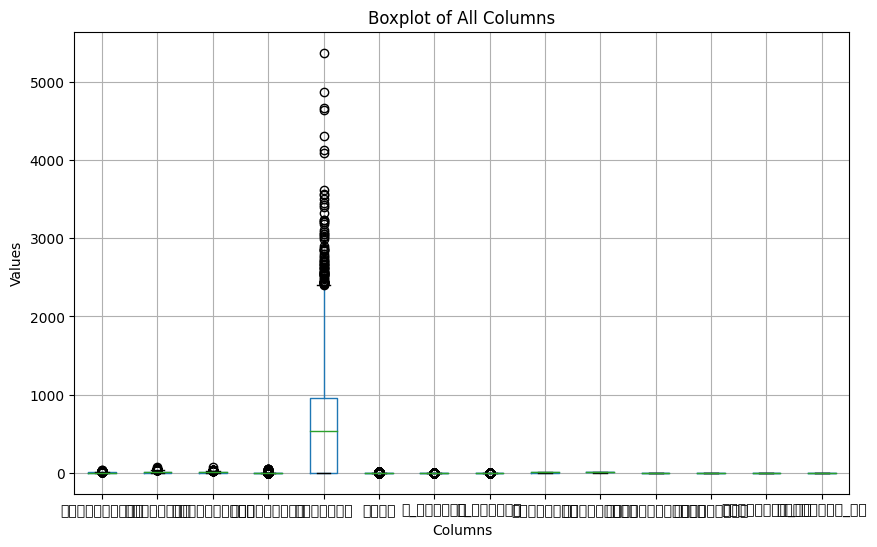

In [39]:
plt.figure(figsize=(10, 6))
df_highSchool.boxplot()
plt.title('Boxplot of All Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

In [54]:
#2. IQR 방식
def outliers_iqr(df_highSchool):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((df_highSchool > upper_bound) | (df_highSchool < lower_bound))

In [57]:
df_highSchool = outliers_iqr(df_highSchool, ['사교육비통비용'])

TypeError: outliers_iqr() takes 1 positional argument but 2 were given

<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54980 (\N{HANGUL SYLLABLE HU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 52280 (\N{HANGUL SYLLABLE CAM}) missing from current font.
  func(*ar

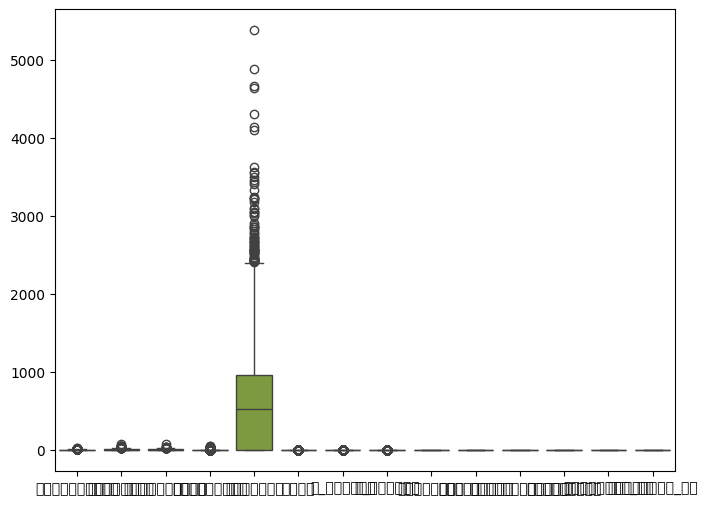

In [41]:
sns.boxplot(data=df_highSchool)

In [60]:
def remove_outliers(df_highSchool, columns, threshold=3):
    for column in columns:
        # Z-score 계산
        z_scores = np.abs((df_highSchool[column] - df_highSchool[column].mean()) / df_highSchool[column].std())

        # 이상치 제거
        df_highSchool = df_highSchool[z_scores < threshold]

    return df_highSchool

In [61]:
df_highSchool = remove_outliers(df_highSchool, ['사교육비총비용'])

<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54980 (\N{HANGUL SYLLABLE HU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 52280 (\N{HANGUL SYLLABLE CAM}) missing from current font.
  func(*ar

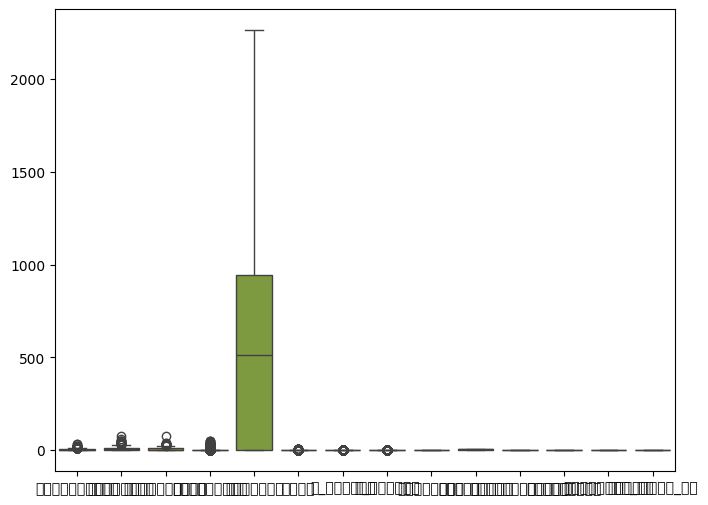

In [62]:
sns.boxplot(data=df_highSchool)

### 분석

3.1 전처리가 완료된 데이터를 통해 분석을 진행하세요.

- target variable은 사교육비총비용
- 최소 2개의 모델 사용
- 위에서 진행한 전처리 방식과 달라도 무방(단, 전처리 과정에 대한 서술 필요)

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df_highSchool.drop(columns=['사교육비총비용']) #X는 독립 변수, y는 종속 변수
y = df_highSchool['사교육비총비용']

# 훈련 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 생성 및 학습
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred_lr = model_lr.predict(X_test)

# 성능 측정 (예를 들어, 평균 제곱 오차)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print("선형 회귀 모델의 평균 제곱 오차:", mse_lr)


선형 회귀 모델의 평균 제곱 오차: 114437.83695776212


In [65]:
from sklearn.ensemble import RandomForestRegressor

# 랜덤 포레스트 모델 생성 및 학습
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred_rf = model_rf.predict(X_test)

# 성능 측정 (평균 제곱 오차)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("랜덤 포레스트 모델의 평균 제곱 오차:", mse_rf)

랜덤 포레스트 모델의 평균 제곱 오차: 93629.84214440358


In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df_highSchool[['방과후학교참여시간수', '사교육참여시간수', '일반교과사교육시간수', '예체능사교육시간수']] #X는 독립 변수, y는 종속 변수
y = df_highSchool['사교육비총비용']

# 훈련 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 생성 및 학습
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred_lr = model_lr.predict(X_test)

# 성능 측정 (예를 들어, 평균 제곱 오차)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print("선형 회귀 모델의 평균 제곱 오차:", mse_lr)

선형 회귀 모델의 평균 제곱 오차: 121688.01151315666


In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df_highSchool[['부_교육정도코드', '모_교육정도코드']] #X는 독립 변수, y는 종속 변수
y = df_highSchool['사교육비총비용']

# 훈련 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 생성 및 학습
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred_lr = model_lr.predict(X_test)

# 성능 측정 (예를 들어, 평균 제곱 오차)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print("선형 회귀 모델의 평균 제곱 오차:", mse_lr)

선형 회귀 모델의 평균 제곱 오차: 284495.2859158337


In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df_highSchool[['부모경제활동코드', '월평균가구소득코드']] #X는 독립 변수, y는 종속 변수
y = df_highSchool['사교육비총비용']

# 훈련 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 생성 및 학습
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred_lr = model_lr.predict(X_test)

# 성능 측정 (예를 들어, 평균 제곱 오차)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print("선형 회귀 모델의 평균 제곱 오차:", mse_lr)

선형 회귀 모델의 평균 제곱 오차: 258977.79779799716


In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# 데이터 불러오기 (데이터 파일 경로에 맞게 변경해야 함)
data = df_highSchool

# 독립 변수와 종속 변수 분리
X = data[['방과후학교참여시간수', '사교육참여시간수', '일반교과사교육시간수', '예체능사교육시간수',
          '사교육비총비용', '총자녀수', '부_교육정도코드', '모_교육정도코드',
          '부모경제활동코드', '월평균가구소득코드', '진학희망고등학교유형코드', '방과후학교참여여부']]
y = data['학생성적구분코드_상위']  # 학업 성취도를 예측하는 것으로 가정

# 데이터 분할 (학습 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# 랜덤 포레스트 모델
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 모델 평가
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse

linear_mse = evaluate_model(linear_model, X_test, y_test)
rf_mse = evaluate_model(rf_model, X_test, y_test)

print('선형 회귀 모델 MSE:', linear_mse)
print('랜덤 포레스트 모델 MSE:', rf_mse)


선형 회귀 모델 MSE: 0.19736220699700308
랜덤 포레스트 모델 MSE: 0.22633199927306388
